# MaNGA Visual Morphology Catalogue (MVM-VAC) - Tutorial

Credit: Jose Antonio Vazquez Mata

See [SDSS DR16 MVM](https://www.sdss.org/dr16/data_access/value-added-catalogs/?vac_id=manga-visual-morphologies-from-sdss-and-desi-images) for more information about this VAC.

This catalogue contains a direct visual morphological classification based on the inspection of image mosaics generated from a combination of SDSS and Dark Energy Legacy Surveys (DESI; legacysurvey.org) images, for all galaxies in MaNGA with unique MaNGA-ID. After a digital image post-processing, we exploit the advantages of these images to identify inner structures, as well as external low surface brightness features for an homogeneous classification. We provide the corresponding mosaics for all MaNGA DR17 galaxies, and also a new estimate of the structural CAS parameters (Concentration, Asymmetry and Clumpiness) based on the DESI images.

The image mosaics generated to carry out this classification are also accessible.

This catalogue has 2 versions:

Version_1.0.1 contains the information for the first 4614 galaxies (MPL-7) and was released as part of the SDSS DR16.

DataModel: https://data.sdss.org/datamodel/files/MANGA_MORPHOLOGY/manga_visual_morpho/1.0.1/manga_visual_morpho.html 
Files: https://data.sdss.org/sas/dr16/manga/morphology/manga_visual_morpho/1.0.1/

Version_2.0.1 contains the information for the ~10200 galaxies in the last DR17 (MPL-11), with some updates compared to previous version, as decribed in the Data Model. We suggest the reader to use this version. 

DataModel: https://data.sdss.org/datamodel/files/MANGA_MORPHOLOGY/manga_visual_morpho/2.0.1/manga_visual_morpho.html
Files: https://data.sdss.org/sas/dr17/manga/morphology/manga_visual_morpho/2.0.1/

# Accessing the MVM-VAC through Marvin

The first step is to import the marvin libraries to access the information

In [1]:
import marvin
from marvin.tools import Cube
from marvin.tools import Maps
from marvin.tools.vacs import VACs

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /Users/jv47/sas/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/jv47/sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


# Setting the Data Release (DR) version

If the DR version is not especified, Marvin sets DR15 as default version. In order to change the DR version, the following lines must be used to replace "DR16" for the version required. NOTE: the MVM-VAC is only available in the DR16 and DR17 versions

In [2]:
from marvin import config
config.setRelease("DR16")

[WARNING]: path /Users/jv47/sas/dr16/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/jv47/sas/dr16/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


To make sure the VAC required in the selected DR version, the following instruction can be follow to list the VACs available:

In [3]:
v = VACs()
v

<VACs (firefly, galaxyzoo, gema, HI, visual_morphology)>

# Setting your target 

Please provide the plate-IFU information of your target:

In [4]:
cube = Cube('9891-1902')
cube

<Marvin Cube (plateifu='9891-1902', mode='remote', data_origin='api')>

Here you can see the VACs containing information of your target:

In [5]:
vacs=cube.vacs
vacs

<VACContainer ('firefly', 'galaxyzoo', 'gema', 'HI', 'visual_morphology')>

# The MaNGA Visual Morphology Catalogue

To call the information of your target in the MVM-VAC follow the next lines. Note: if you haven not download the tables and images (using Marvin), this instruction will download the VAC table and the corresponding images associated to your target

In [6]:
morp = vacs.visual_morphology
print(morp)
print(type(morp))

[WARNING]: You are accessing outdated DR16 data for this VAC.  This target has updated data in DR17. We recommend using the new data release instead.


Target(9891-1902)
<class 'marvin.contrib.vacs.visual_morph.VizMorphTarget'>


Use "data" to access the data for your target. In order to understand the meaning of each column, we refer the reader to the corresponding DataModel, following the links provided at the top of this tutorial

In [7]:
morp.data

FITS_rec([('manga-9891-1902', '9891-1902', '1-373827', 228.78634859, 28.38498037, 'Sbc', 4, 0, 0, 3.217, 0.053, 0.11, 0.009, 0.37, 0.451)],
         dtype=(numpy.record, [('name', 'S17'), ('plateifu', 'S11'), ('MANGAID', 'S9'), ('objra', '>f8'), ('objdec', '>f8'), ('Type', 'S6'), ('TType', '>i2'), ('edge_on', '>i2'), ('tidal', '>i2'), ('C', '>f4'), ('E_C', '>f4'), ('A', '>f4'), ('E_A', '>f4'), ('S', '>f4'), ('E_S', '>f4')]))

You can get the information of a specific column adding its name:

In [8]:
morp.data.Type

chararray(['Sbc'], dtype='<U6')

In [9]:
print(morp.data.C, morp.data.E_C)

[3.217] [0.053]


# Access to the Image Mosaics

Additional to the data, we also provide the image mosaics used to extract the information in the MVM-VAC. To access these mosaics use the instruction: morp.show_mosaic('survey')

Version_1.0.1 (DR16). For this version there are two sets of mosaics: 

i) the SDSS mosaic, containing a gray logarithmic-scaled r-band image, a filter-enhanced r-band image and the corresponding gri colour composite image, from the SDSS images. 'survey'='sdss'

ii) the DESI mosaic, containing a filter-enhanced r-band image and the corresponding gri colour composite image, from the DESI images. 'survey'='desi'

Version_2.0.1 (DR17).

For this version, we have combined the relevant information from SDSS and DESI surveys in one mosaic. This mosacis contains the gri colour composite image from SDSS; the grz colour composite image, the residual image after subtraction of a best surface brightness model and the filter-enhanced r-band image from the DESI Legacy Surveys. 'survey'='mos'



NOTE: For DR16, must specify either survey: sdss or desi. For DR17 must write: mos


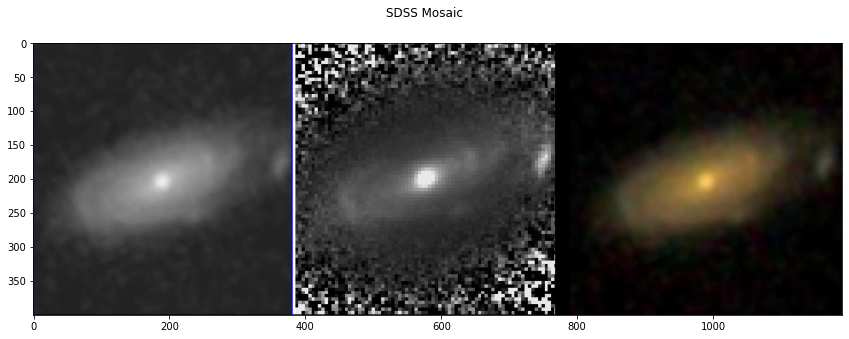

In [10]:
morp.show_mosaic('sdss')

# Full Catalogue Access

To get access to the full catalogue follow:

In [11]:
mvm = v.visual_morphology
table = mvm.get_table(ext=1)

In [12]:
table

name,plateifu,MANGAID,objra,objdec,Type,TType,edge_on,tidal,C,E_C,A,E_A,S,E_S
bytes17,bytes11,bytes9,float64,float64,bytes6,int16,int16,int16,float32,float32,float32,float32,float32,float32
manga-10001-12701,10001-12701,1-48157,133.371090612,57.5984251446,Sbc,4,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
manga-10001-12702,10001-12702,1-48188,133.685669869,57.4802503218,SABbc,4,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
manga-10001-12703,10001-12703,1-55648,136.017159969,57.0923291779,Sbc,4,0,0,3.296,0.055,0.13,0.019,-0.71,0.857
manga-10001-12704,10001-12704,1-55616,133.989966869,57.6779676669,S,11,1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
manga-10001-12705,10001-12705,1-55784,136.75137451,57.4514369241,Sbc,4,0,0,2.903,0.046,0.125,0.015,0.53,0.676
manga-10001-1901,10001-1901,1-55567,133.330028009,57.0411553708,S0,-2,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
manga-10001-1902,10001-1902,1-48201,134.193923352,56.7867469988,SBa,1,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
manga-10001-3701,10001-3701,1-48111,132.465646765,57.1437279024,S0,-2,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
manga-10001-3702,10001-3702,1-48136,132.912768243,57.1074235568,E,-5,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


# Plots

It is possible to extract the data from the "table", and plot the data from this catalogue using Matplotlib

In [13]:
table['TType', 'C']

Ttype = table['TType']
C = table['C']

idx = (C>=0)*(Ttype<12)

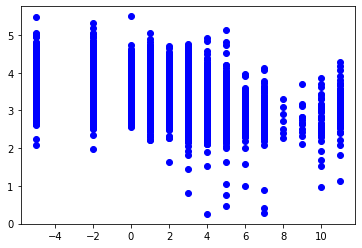

In [14]:
import matplotlib.pyplot as plt

plt.plot(Ttype[idx], C[idx], 'bo')